# Analytical functions

This notebook simply shows off some analytical functions available in this package and that can be used for benchmarking.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

from pbnn.utils.analytical_functions import (
    g_function,
    gramacy_function,
    heteroscedastic_trigonometric_function,
    ishigami_function,
    trigonometric_function,
)

%load_ext watermark

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


Text(0.5, 0.5, '$x_2$')

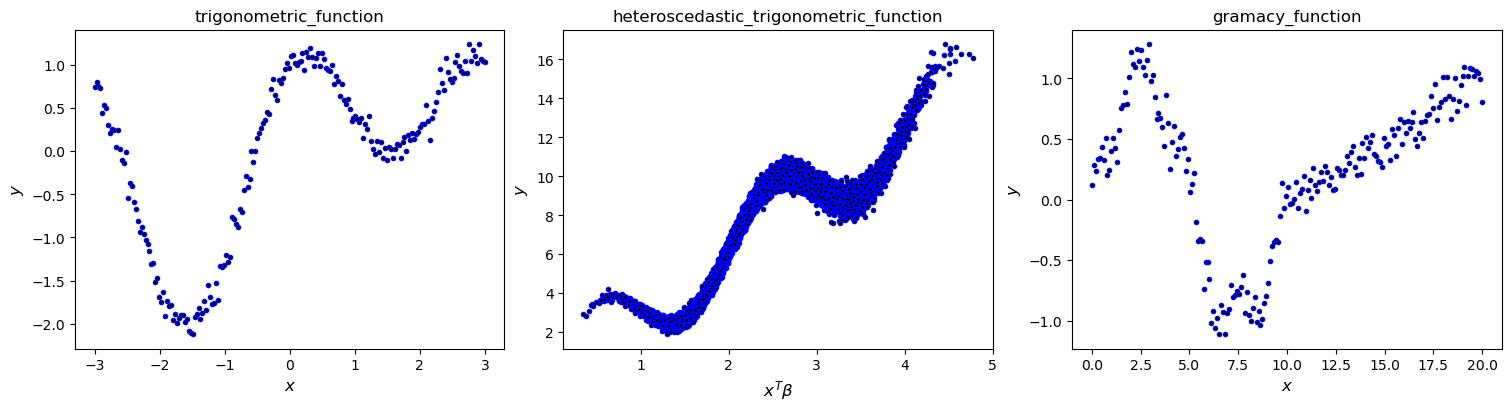

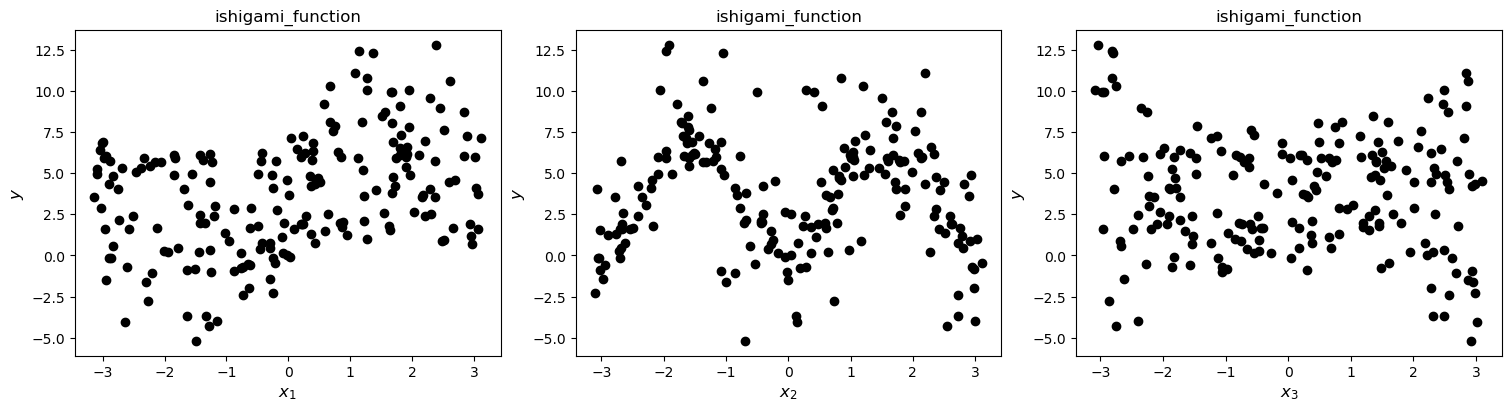

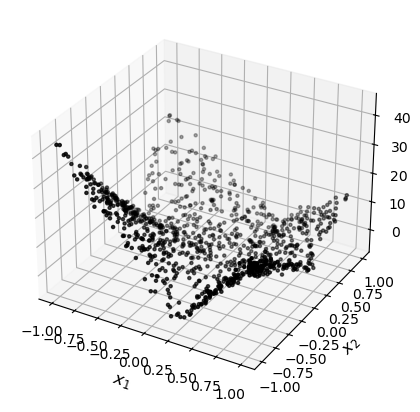

In [2]:
fig = plt.figure(constrained_layout=True, figsize=(3 * 5, 1 * 4))
gs = GridSpec(nrows=1, ncols=3, figure=fig)

# test function 1
x = np.linspace(-3, 3, 200)[:, None]
noise_level = 0.1
noise = noise_level * np.random.randn(*x.shape)
y = trigonometric_function(x, noise)
ax = fig.add_subplot(gs[0])
ax.plot(x, y, ls="", color="k", marker=".", markeredgecolor="b", markeredgewidth=1)
ax.set_xlabel(r"$x$", fontsize=12)
ax.set_ylabel(r"$y$", fontsize=12)
ax.set_title("trigonometric_function", fontsize=12)

# test function 2
noise_level = 1.0
x = np.random.uniform(low=0, high=1.0, size=(20000, 1000))
noise_level = 0.1
noise = noise_level * np.random.randn(x.shape[0], 1)
y = heteroscedastic_trigonometric_function(x, noise)
beta = np.zeros((x.shape[1],))
beta[0:5] = 1.0
ax = fig.add_subplot(gs[1])
ax.plot(
    np.dot(x, beta),
    y,
    ls="",
    color="k",
    marker=".",
    markeredgecolor="b",
    markeredgewidth=1,
)
ax.set_xlabel(r"$x^T \beta$", fontsize=12)
ax.set_ylabel(r"$y$", fontsize=12)
ax.set_title("heteroscedastic_trigonometric_function", fontsize=12)

# test function 3
x = np.linspace(0, 20, 200)[:, None]
noise_level = 0.1
noise = noise_level * np.random.randn(len(x), 1)
y = gramacy_function(x, noise)
ax = fig.add_subplot(gs[2])
ax.plot(x, y, ls="", color="k", marker=".", markeredgecolor="b", markeredgewidth=1)
ax.set_xlabel(r"$x$", fontsize=12)
ax.set_ylabel(r"$y$", fontsize=12)
ax.set_title("gramacy_function", fontsize=12)

# test function 4
x = np.random.uniform(low=-np.pi, high=np.pi, size=(200, 3))
noise_level = 0.1
noise = noise_level * np.random.randn(len(x))
y = ishigami_function(x, noise)
fig = plt.figure(constrained_layout=True, figsize=(3 * 5, 1 * 4))
gs = GridSpec(nrows=1, ncols=3, figure=fig)
for i in range(3):
    ax = fig.add_subplot(gs[i])
    ax.plot(x[:, i], y, ls="", color="k", marker="o")
    ax.set_xlabel(rf"$x_{i+1}$", fontsize=12)
    ax.set_ylabel(r"$y$", fontsize=12)
    ax.set_title("ishigami_function", fontsize=12)

# test function 5
noise_level = 1.0
x = 2 * np.random.rand(1000, 2) - 1
noise = noise_level * np.random.randn(len(x))
y = g_function(x, noise)

fig = plt.figure(constrained_layout=True, figsize=(5, 4))
ax = fig.add_subplot(projection="3d")
ax.scatter(x[:, 0], x[:, 1], y, marker=".", color="k")
ax.set_xlabel(r"$x_1$", fontsize=12)
ax.set_ylabel(r"$x_2$", fontsize=12)

In [3]:
%reload_ext watermark
%watermark -n -u -v -iv -w -a 'Brian Staber'

Author: Brian Staber

Last updated: Tue Feb 27 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.21.0

matplotlib: 3.8.2
numpy     : 1.26.3

Watermark: 2.4.3

